In [9]:
import numpy as np
import matplotlib.pyplot as plt
from src.fsk_modem import FSKModem
%matplotlib widget

In [10]:
# settings
np.random.seed(2)
fs_hz = 1000
fc_hz =  50
symb_per_sec = 10
modulation = "fsk" # [fsk, cpfsk, gmsk]
num_transmit_bits = 24

# modem block init
modem_block = FSKModem(f_symb_hz=symb_per_sec, m=6)

# FFT settings
n_fft = 4 * (num_transmit_bits * int(fs_hz / symb_per_sec))
freqs = np.linspace(-fs_hz/2, fs_hz/2, n_fft)

In bits:  0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1


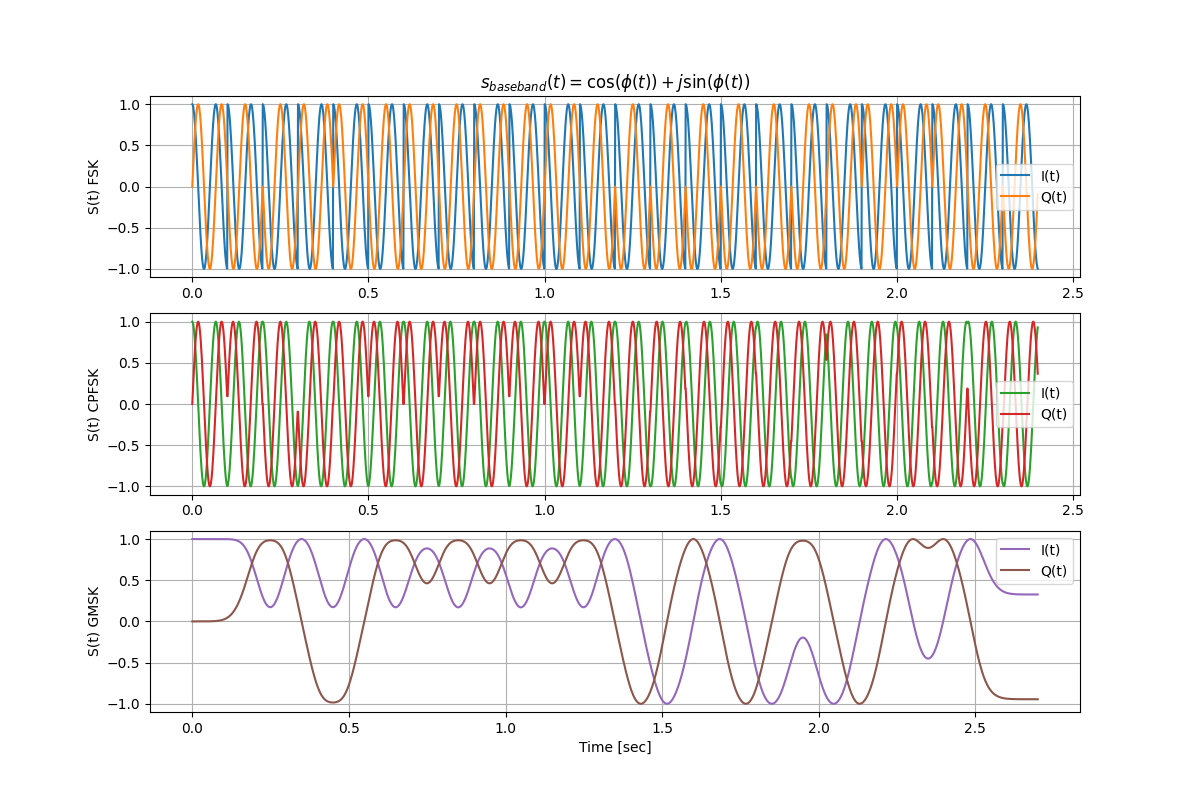

In [11]:
bit_message = np.random.randint(low=0, high=2, size=num_transmit_bits)
print("In bits: ", *bit_message)
fsk_bb_signal = modem_block.FSK_complex_envelope(bit_message, symb_per_sec, fs_hz)
cpfsk_bb_signal = modem_block.CPFSK_complex_envelope(bit_message, symb_per_sec, fs_hz)
gmsk_bb_signal = modem_block.GMSK_complex_envelope(bit_message, symb_per_sec, fs_hz)
fsk_time_array = np.arange(0, len(fsk_bb_signal), 1) / fs_hz
cpfsk_time_array = np.arange(0, len(cpfsk_bb_signal), 1) / fs_hz
gmsk_time_array = np.arange(0, len(gmsk_bb_signal), 1) / fs_hz

fig1 = plt.figure(figsize=(12,8))

ax1 = fig1.add_subplot(311)

ax1.set_title(r'$s_{baseband}(t)=\cos(\phi(t))+j\sin(\phi(t))$')
ax1.plot(fsk_time_array, np.real(fsk_bb_signal), label='I(t)', color="C0")
ax1.plot(fsk_time_array, np.imag(fsk_bb_signal), label='Q(t)', color="C1")
ax1.set_ylabel('S(t) FSK')
ax1.legend()
ax1.grid()

ax2 = fig1.add_subplot(312)

ax2.plot(cpfsk_time_array, np.real(cpfsk_bb_signal), label='I(t)', color="C2")
ax2.plot(cpfsk_time_array, np.imag(cpfsk_bb_signal), label='Q(t)', color="C3")
ax2.set_ylabel('S(t) CPFSK')
ax2.legend()
ax2.grid()

ax3 = fig1.add_subplot(313)

ax3.plot(gmsk_time_array, np.real(gmsk_bb_signal), label='I(t)', color="C4")
ax3.plot(gmsk_time_array, np.imag(gmsk_bb_signal), label='Q(t)', color="C5")
ax3.set_xlabel('Time [sec]')
ax3.set_ylabel('S(t) GMSK')
ax3.legend()
ax3.grid()

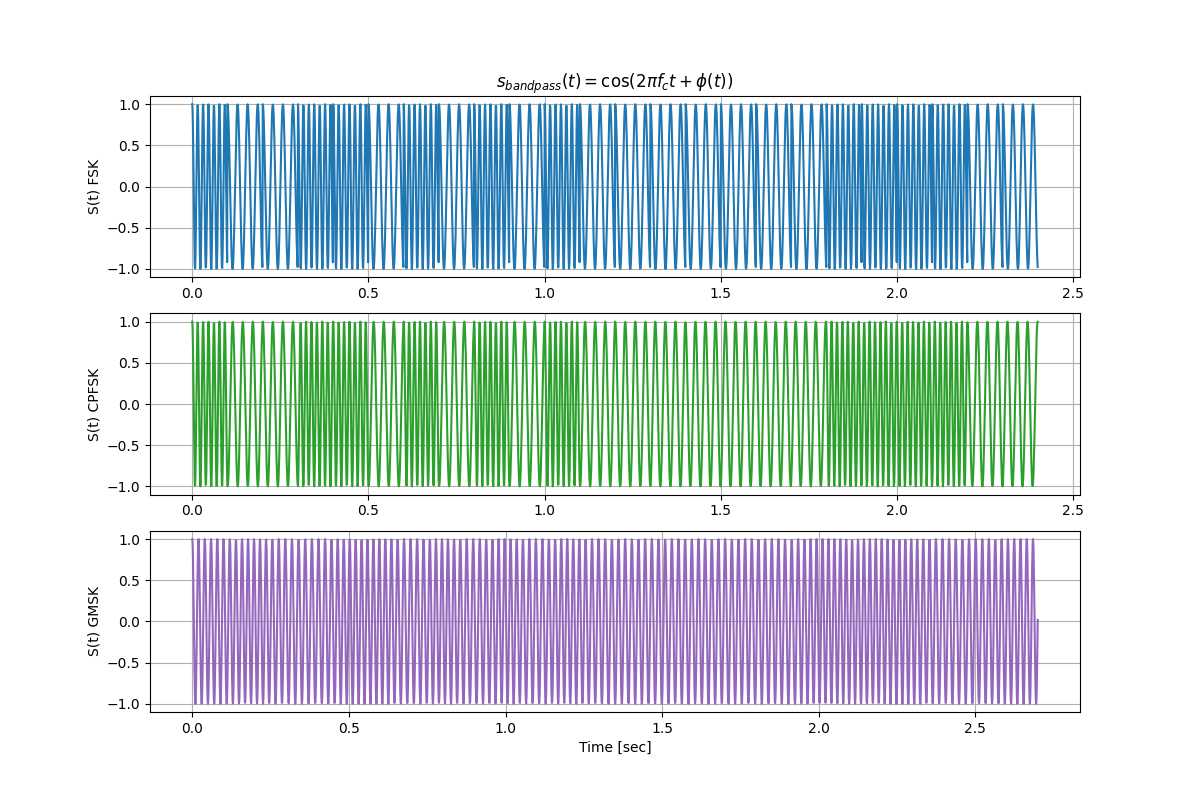

In [12]:
fsk_rf_signal = modem_block.modulate(bit_message, symb_per_sec, fs_hz, fc_hz, mod_type="FSK")
cpfsk_rf_signal = modem_block.modulate(bit_message, symb_per_sec, fs_hz, fc_hz, mod_type="CPFSK")
gmsk_rf_signal = modem_block.modulate(bit_message, symb_per_sec, fs_hz, fc_hz, mod_type="GMSK")

fig2 = plt.figure(figsize=(12,8))

ax1 = fig2.add_subplot(311)
ax1.set_title(r'$s_{bandpass}(t)=\cos(2\pi f_c t + \phi(t))$')
ax1.plot(fsk_time_array, fsk_rf_signal, color='C0')
ax1.set_ylabel('S(t) FSK')
ax1.grid()

ax2 = fig2.add_subplot(312)
ax2.plot(cpfsk_time_array, cpfsk_rf_signal, color='C2')
ax2.set_ylabel('S(t) CPFSK')
ax2.grid()

ax2 = fig2.add_subplot(313)
ax2.plot(gmsk_time_array, gmsk_rf_signal, color='C4')
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('S(t) GMSK')
ax2.grid()

### GMSK

In [14]:
bb_signal = modem_block.GMSK_complex_envelope(bit_message, symb_per_sec, fs_hz)
rf_signal = modem_block.modulate(bit_message, symb_per_sec, fs_hz, fc_hz, mod_type='GMSK')
time_array = np.arange(0, len(bb_signal), 1) / fs_hz

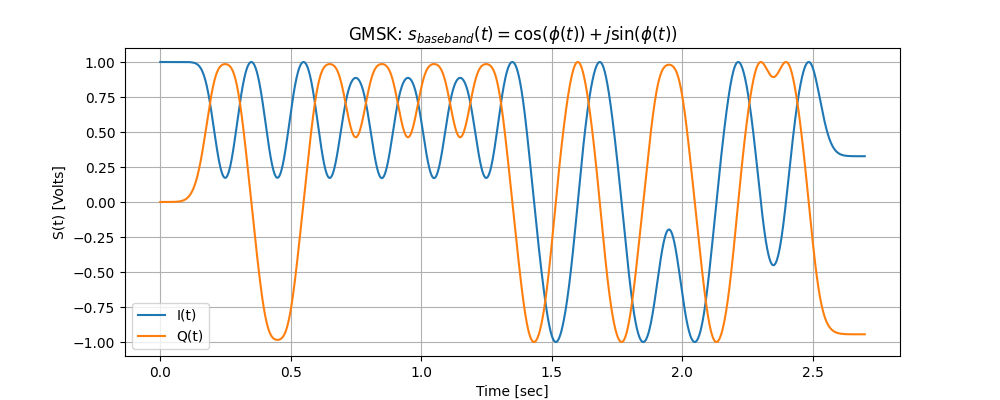

In [15]:
fig3 = plt.figure(figsize=(10,4))
ax_1 = fig3.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{baseband}(t)=\cos(\phi(t))+j\sin(\phi(t))$')
ax_1.plot(time_array, np.real(bb_signal), label='I(t)')
ax_1.plot(time_array, np.imag(bb_signal), label='Q(t)')
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.legend()
ax_1.grid()

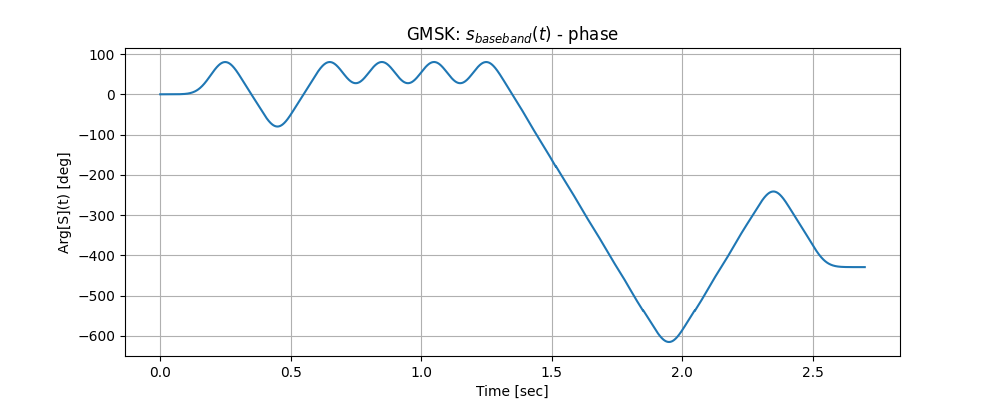

In [16]:
fig3_1 = plt.figure(figsize=(10,4))
ax_1 = fig3_1.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{baseband}(t)$ - phase')
ax_1.plot(time_array, np.unwrap(np.degrees(np.angle(bb_signal))))
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('Arg[S](t) [deg]')
ax_1.grid()

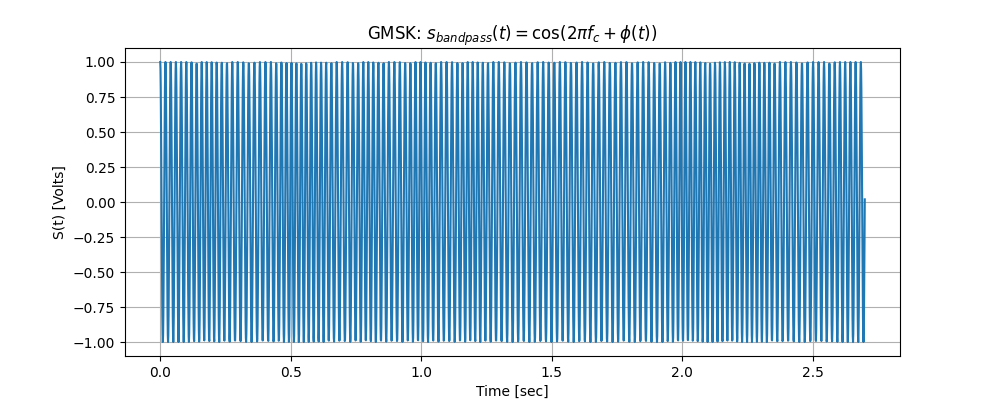

In [17]:
fig4 = plt.figure(figsize=(10,4))
ax_1 = fig4.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{bandpass}(t)=\cos(2\pi f_c + \phi(t))$')
ax_1.plot(time_array, rf_signal)
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.grid()